In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Data Importing**


In [157]:
df=pd.read_csv('/content/Railway_clean.csv')
df

,Transaction_ID,Date_Time_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Reason_for_Delay,Refund_Request,Journey_Status
0,da8a6ba8-b3dc-4677-b176,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,No Delay,No,On Time
1,b0cdd1b0-f214-4197-be53,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Signal Failure,No,Delayed
2,f3ba7a96-f713-40d9-9629,2023-12-19 19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,No Delay,No,On Time
3,b2471f11-4fe7-4c87-8ab4,2023-12-20 23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,No Delay,No,On Time
4,2be00b45-0762-485e-a7a3,2023-12-27 18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,No Delay,No,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30 18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00,No Delay,No,On Time
31649,7da22246-f480-417c-bc2f,2024-04-30 18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00,No Delay,No,On Time
31650,add9debf-46c1-4c75-b52d,2024-04-30 18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00,No Delay,No,On Time
31651,b92b047c-21fd-4859-966a,2024-04-30 19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00,No Delay,No,On Time


# **Data Visualization**

**Railway Insights**

1- What are the total sales by ticket type ?

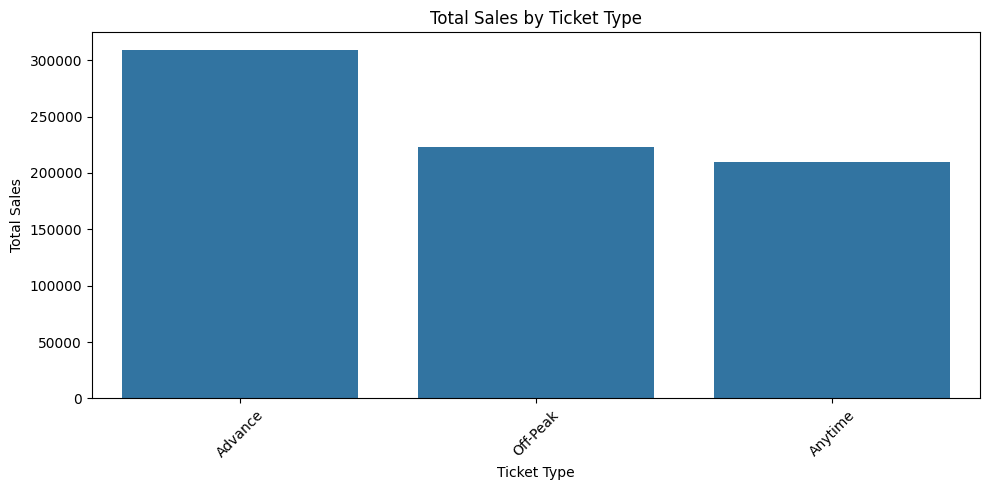

In [158]:
#Total sales by ticket type
ticket_type_sales = df.groupby('Ticket_Type')['Price'].sum().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=ticket_type_sales.index, y=ticket_type_sales.values)
plt.title("Total Sales by Ticket Type")
plt.ylabel("Total Sales")
plt.xlabel("Ticket Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2- How do online purchases compare to station purchases in terms of Sales?

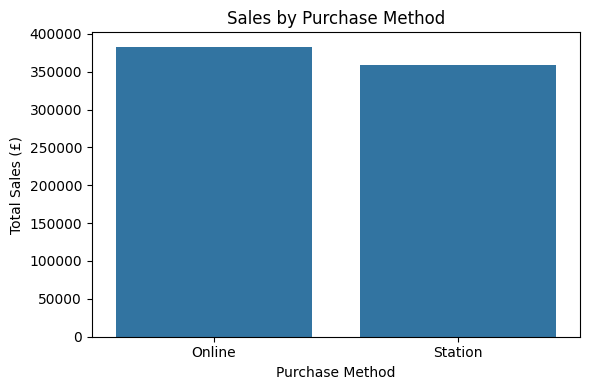

In [159]:
purchase_type_sales = df.groupby('Purchase_Type')['Price'].sum()

# Visualize
plt.figure(figsize=(6, 4))
sns.barplot(x=purchase_type_sales.index, y=purchase_type_sales.values)
plt.title("Sales by Purchase Method")
plt.ylabel("Total Sales (£)")
plt.xlabel("Purchase Method")
plt.tight_layout()
plt.show()

3- What is the impact of ticket class (Standard vs First Class) on average price and sales volume?

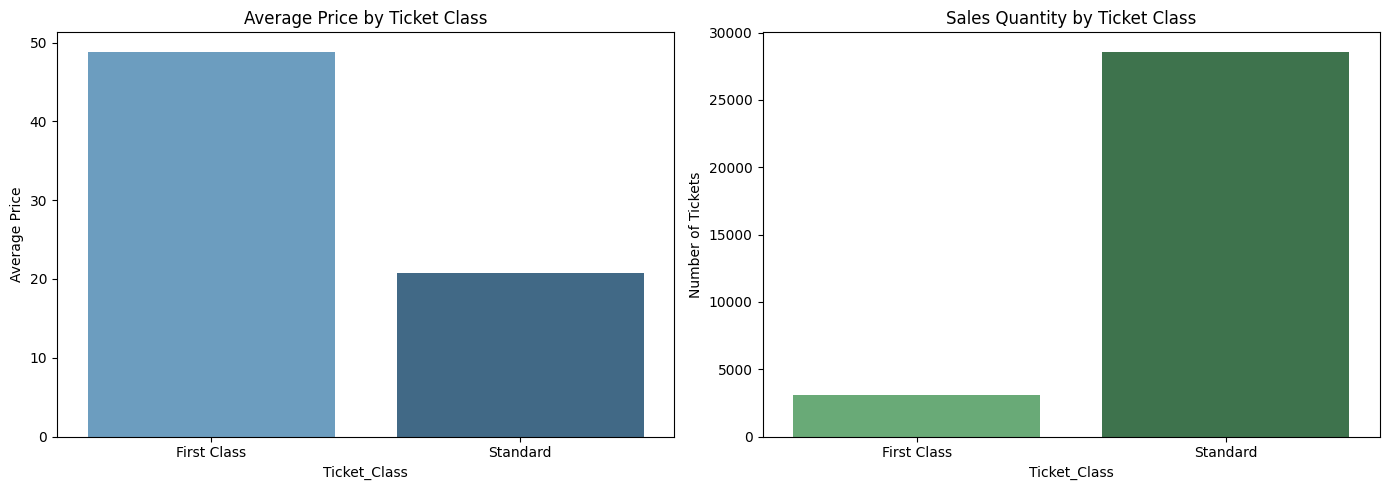

In [160]:
# Group by Ticket_Class to analyze impact on average price and total sales volume
class_summary = df.groupby('Ticket_Class')['Price'].agg(['mean', 'sum', 'count']).reset_index()
class_summary.columns = ['Ticket_Class', 'Average_Price', 'Total_Revenue', 'Number_of_Tickets']

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Average Price per Ticket Class
sns.barplot(x='Ticket_Class', y='Average_Price', data=class_summary, ax=axs[0], palette='Blues_d')
axs[0].set_title('Average Price by Ticket Class')
axs[0].set_ylabel('Average Price')

# Number of Tickets Sold by Class
sns.barplot(x='Ticket_Class', y='Number_of_Tickets', data=class_summary, ax=axs[1], palette='Greens_d')
axs[1].set_title('Sales Quantity by Ticket Class')
axs[1].set_ylabel('Number of Tickets')

plt.tight_layout()
plt.show()




4- What percentage of journeys arrive on time versus delayed?

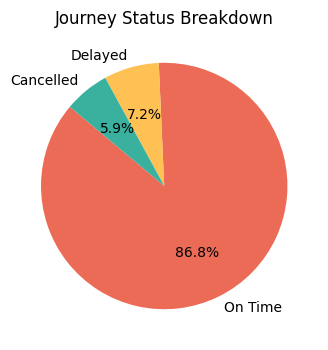

In [161]:
journey_status_counts = df['Journey_Status'].value_counts(normalize=True) * 100

# Visualize
plt.figure(figsize=(6, 4))
journey_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#EC6B56','#FFC154','#3AB09E'])
plt.title("Journey Status Breakdown")
plt.ylabel("")
plt.show()


5- What are the most common reasons for delays?

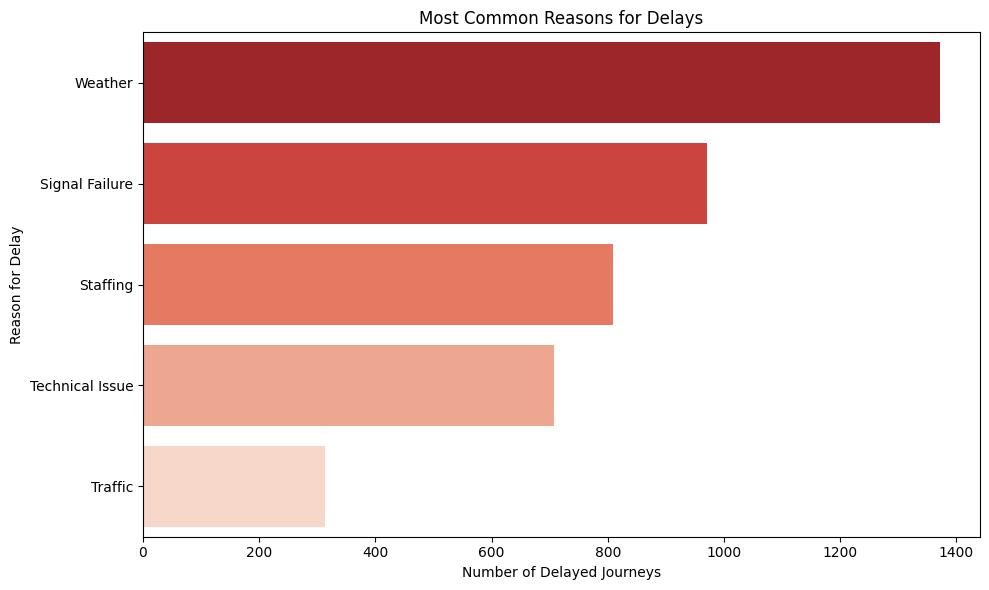

In [162]:
# Count the frequency of each delay reason, excluding 'No Delay'
delay_reasons = df[df['Reason_for_Delay'] != 'No Delay']['Reason_for_Delay'].value_counts()

# Visualizing
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette='Reds_r')
plt.title("Most Common Reasons for Delays")
plt.xlabel("Number of Delayed Journeys")
plt.ylabel("Reason for Delay")
plt.tight_layout()
plt.show()



6- What are the peak travel dates and times?

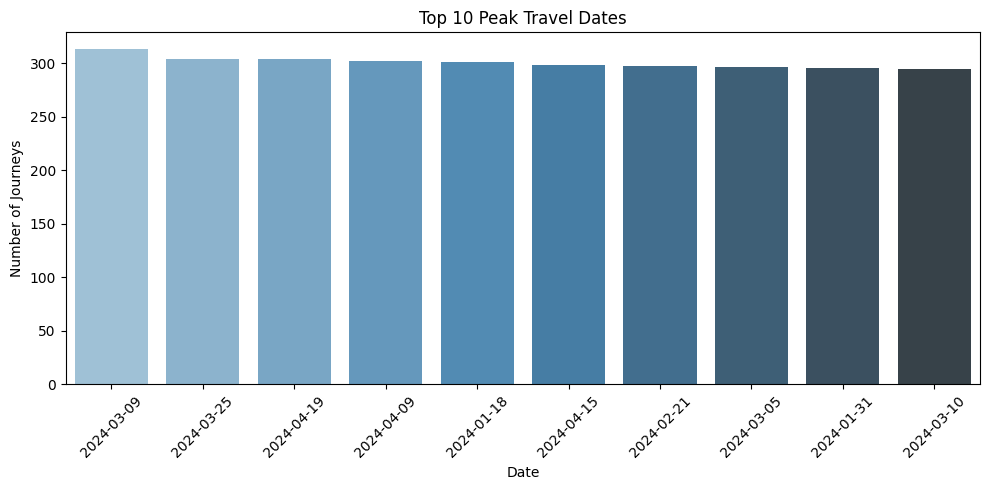

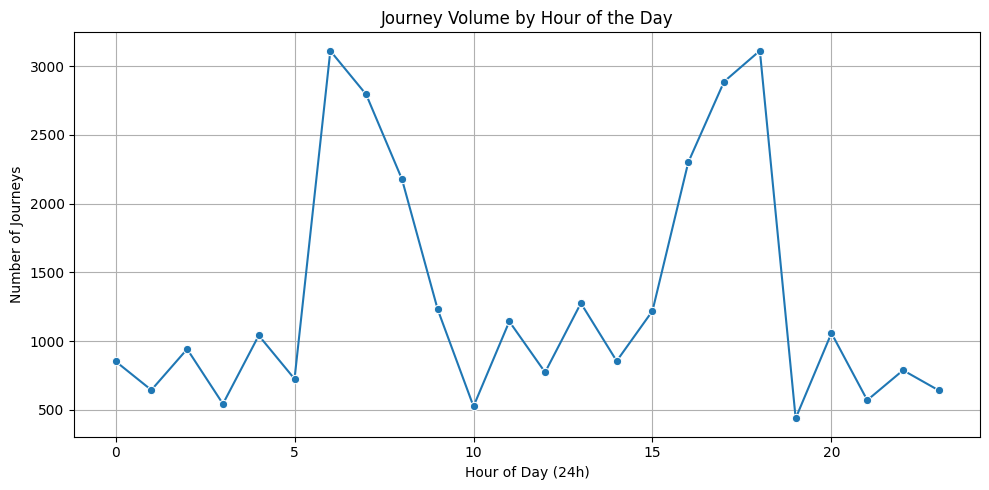

In [163]:
#convert
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])
# Extract date and hour
df['Travel_Date'] = df['Date_of_Journey'].dt.date
df['Travel_Hour'] = df['Departure_Time'].dt.hour

# Peak Travel Dates
top_dates = df['Travel_Date'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_dates.index.astype(str), y=top_dates.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Top 10 Peak Travel Dates")
plt.xlabel("Date")
plt.ylabel("Number of Journeys")
plt.tight_layout()
plt.show()

# Peak Travel Hours
hourly_counts = df['Travel_Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title("Journey Volume by Hour of the Day")
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Journeys")
plt.grid(True)
plt.tight_layout()
plt.show()

7- Which stations are the busiest ?

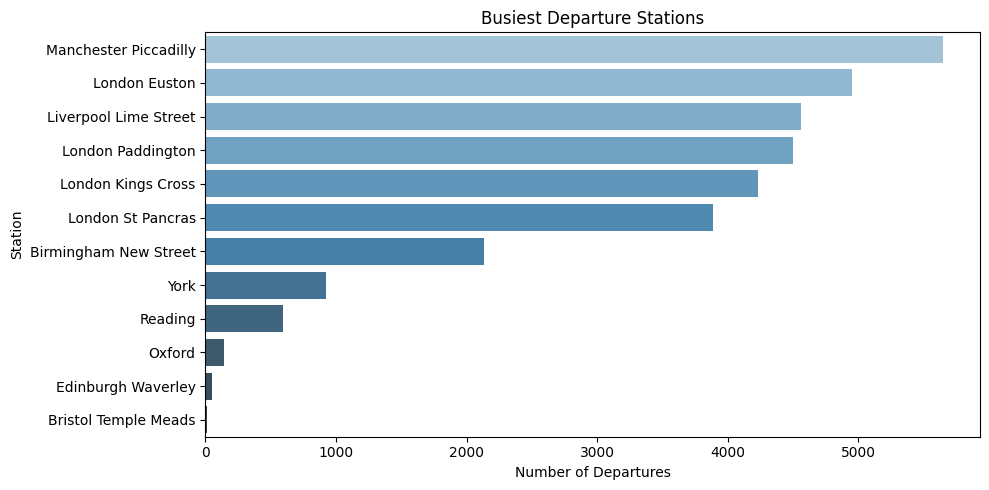

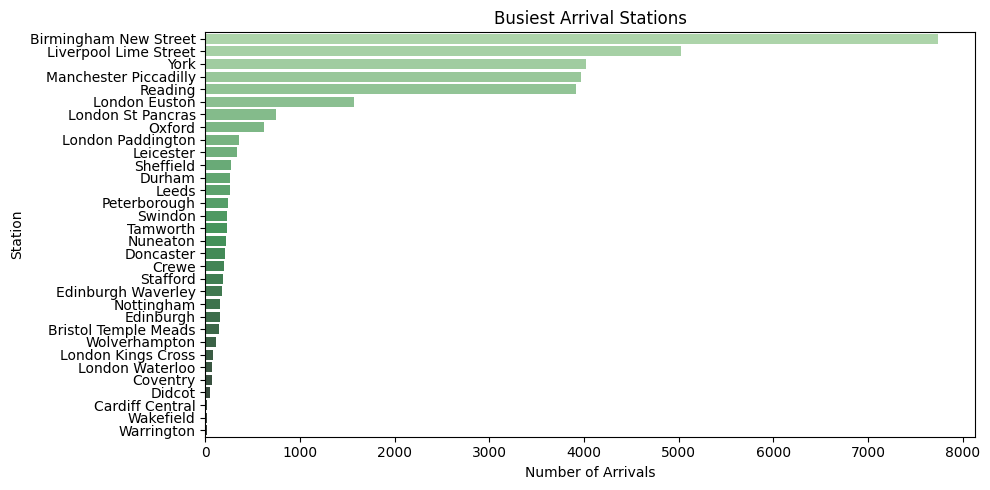

In [164]:
#Departure Stations
top_departure_stations = df['Departure_Station'].value_counts()

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=top_departure_stations.values, y=top_departure_stations.index, palette='Blues_d')
plt.title("Busiest Departure Stations")
plt.xlabel("Number of Departures")
plt.ylabel("Station")
plt.tight_layout()
plt.show()

#Arrival Stations
top_arrival_stations = df['Arrival_Destination'].value_counts()

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=top_arrival_stations.values, y=top_arrival_stations.index, palette='Greens_d')
plt.title("Busiest Arrival Stations")
plt.xlabel("Number of Arrivals")
plt.ylabel("Station")
plt.tight_layout()
plt.show()

8-What are the most used payment methods?

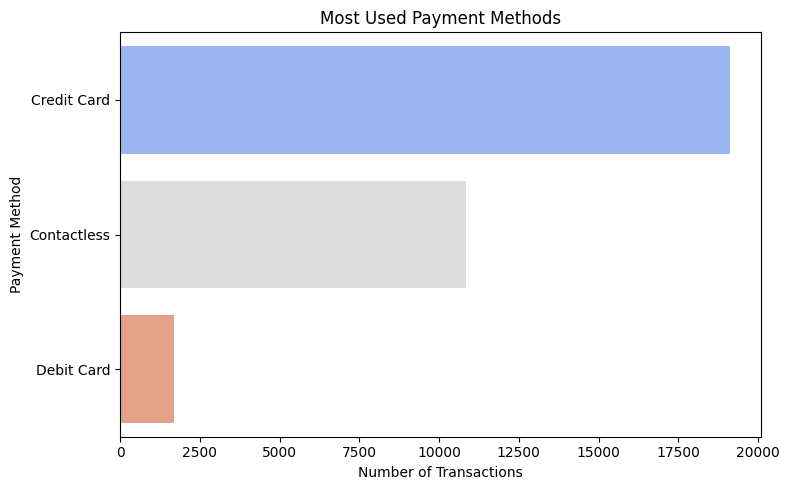

In [165]:
# Count occurrences of each payment method
payment_counts = df['Payment_Method'].value_counts()

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='coolwarm')
plt.title("Most Used Payment Methods")
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()
